In [1]:
import keras
#importing dataset directly from ones available in keras 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
#Reshaping dataset as CNN requires 3 dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#here xtrain.shape[0] is no. of images
#28x28 is (28,28) image size in pixel and 1 because it is black and white image
#(if it was colored we would have written 3 instead of 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [4]:
# again we convert images into floating type as images originally have uint8 format on which mathmatical operations cannaot be performed
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
#normalization of pixels into 0-1 form as they are in 0-255 form
x_train /= 255
x_test /= 255

In [11]:
#converting labels into one hot encoded value as NN requirement (for only multiclass classification not for regression or binary classification)
from keras.utils import to_categorical
import numpy as np
temp = []
for i in range(len(y_train)):
               temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
               temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#initiating the model
model = Sequential()
#convolution and max pooling layers are applied for feature extraction as well as size reduction of original image
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape,activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#flattening image as NN requires 1D array
model.add(Flatten())
# number of neurons in hidden layer as well as activation function can be selected according to you
# You can select any which gives you optimal solution
model.add(Dense(128, activation="relu"))
# Dropout just drops x% of neurons which are selected randomly
model.add(Dropout(0.2))
#in output layer though activation function and neurons depend on your question in concern (eg binary/multiclass classification/regression)
model.add(Dense(10,activation="softmax")

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [28]:
#model compilation loss is crossentropy if we are performing classification, metrics and optimizer can be choosed according to user.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
 # model training and validation
model.fit(x=x_train,y=y_train, epochs=10,validation_data=(x_test,y_test),batch_size=30)

Epoch 1/10
2000/2000 [==============================] - 31s 16ms/step - loss: 0.1810 - accuracy: 0.9463 - val_loss: 0.0634 - val_accuracy: 0.9793
Epoch 2/10
2000/2000 [==============================] - 26s 13ms/step - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0516 - val_accuracy: 0.9842
Epoch 3/10
2000/2000 [==============================] - 30s 15ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0437 - val_accuracy: 0.9852
Epoch 4/10
2000/2000 [==============================] - 28s 14ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0410 - val_accuracy: 0.9859
Epoch 5/10
2000/2000 [==============================] - 27s 13ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0440 - val_accuracy: 0.9866
Epoch 6/10
2000/2000 [==============================] - 28s 14ms/step - loss: 0.0205 - accuracy: 0.9932 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 7/10
2000/2000 [==============================] - 26s 13ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0497 -

In [30]:
# prediction
prediction=model.predict(x_test)
prediction

array([[3.1114871e-16, 3.0728881e-11, 1.7856196e-11, ..., 1.0000000e+00,
        1.8545790e-13, 1.4880382e-12],
       [1.4699273e-13, 2.1236146e-09, 1.0000000e+00, ..., 3.7195347e-15,
        3.5723625e-16, 2.1192521e-17],
       [5.1858169e-15, 1.0000000e+00, 1.2924158e-12, ..., 3.2790277e-09,
        1.3892281e-12, 1.1350526e-14],
       ...,
       [1.1187607e-21, 5.5332000e-14, 7.1069365e-22, ..., 3.1708384e-14,
        1.2980882e-12, 5.3586672e-14],
       [2.9916333e-11, 1.3445059e-14, 4.8479503e-15, ..., 1.5256388e-14,
        1.4697845e-07, 1.7435295e-12],
       [1.4268011e-14, 8.6626398e-15, 3.6256013e-13, ..., 3.5464279e-24,
        2.1382707e-13, 7.7898974e-19]], dtype=float32)

In [31]:
# argmax returns index of most probable outcome according to our prediction
pred=np.argmax(prediction,axis=1)
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

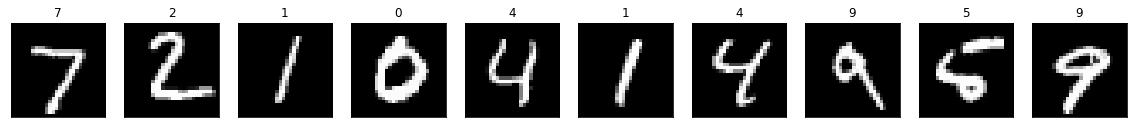

In [32]:
# visualization with predicted labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(pred[i])
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()